### `Banking Case Study:`

 **Import the required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### 1.Load the Data

In [2]:
data = pd.read_csv(r"C:\Users\mythi\Downloads\credit_risk_dataset.csv")
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [4]:
data.shape

(32581, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
data['person_emp_length'].fillna(data['person_emp_length'].median(),inplace = True)
data['person_emp_length'].isnull().sum()

0

In [8]:
data['loan_int_rate'].fillna(data['loan_int_rate'].median(),inplace = True)
data['loan_int_rate'].isnull().sum()

0

In [9]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
data.to_csv("bank_credit_risk.csv")

### Machine Learning Problem
**Build a system which can take features of Credit Risk Scoring Dataset like person_age, person_income, person_home_ownership,person_emp_length, loan_intent, loan_grade, loan_amnt,loan_int_rate,loan_status, loan_percent_income,etc.. and`predicts if a customer is going to default or not of Credit Risk Scoring Dataset`.**

In [10]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [11]:
data = data[['person_age', 'person_income', 'person_home_ownership','person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
'loan_int_rate', 'loan_percent_income','cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status']]

data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1


### 2. Identify the Target Variable and Splitting the Data into Train and Test

Type-`Supervised`

Task-`Reggression`

Target Variable-`loan_status`

In [12]:
# Identifying the inputs (X) and output (y)

y = data['loan_status']

X = data[['person_age', 'person_income', 'person_home_ownership','person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
'loan_int_rate', 'loan_percent_income','cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [13]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [14]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2009,26,37000,RENT,0.0,PERSONAL,B,14000,9.88,0.38,N,4
24210,35,70000,OWN,6.0,VENTURE,B,17000,9.88,0.24,N,6
22659,29,42000,RENT,0.0,EDUCATION,C,7500,12.87,0.18,Y,8
15764,22,166000,MORTGAGE,1.0,EDUCATION,B,23450,11.36,0.14,N,3
11378,26,57800,MORTGAGE,0.0,MEDICAL,D,15000,10.99,0.22,Y,3


In [15]:
print(X_train.shape,y_train.shape)

print(X_test.shape,y_test.shape)

(24435, 11) (24435,)
(8146, 11) (8146,)


### 3.Separating Categorical and Numerical Columns: 

In [16]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2009,26,37000,RENT,0.0,PERSONAL,B,14000,9.88,0.38,N,4
24210,35,70000,OWN,6.0,VENTURE,B,17000,9.88,0.24,N,6
22659,29,42000,RENT,0.0,EDUCATION,C,7500,12.87,0.18,Y,8
15764,22,166000,MORTGAGE,1.0,EDUCATION,B,23450,11.36,0.14,N,3
11378,26,57800,MORTGAGE,0.0,MEDICAL,D,15000,10.99,0.22,Y,3


In [17]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [18]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2009,RENT,PERSONAL,B,N
24210,OWN,VENTURE,B,N
22659,RENT,EDUCATION,C,Y
15764,MORTGAGE,EDUCATION,B,N
11378,MORTGAGE,MEDICAL,D,Y


In [19]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2009,26,37000,0.0,14000,9.88,0.38,4
24210,35,70000,6.0,17000,9.88,0.24,6
22659,29,42000,0.0,7500,12.87,0.18,8
15764,22,166000,1.0,23450,11.36,0.14,3
11378,26,57800,0.0,15000,10.99,0.22,3


### 4. Scaling the Numerical Features

In [20]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2009,26,37000,0.0,14000,9.88,0.38,4
24210,35,70000,6.0,17000,9.88,0.24,6
22659,29,42000,0.0,7500,12.87,0.18,8
15764,22,166000,1.0,23450,11.36,0.14,3
11378,26,57800,0.0,15000,10.99,0.22,3


In [21]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2009,-0.275489,-0.459960,-1.176126,0.702980,-0.366597,1.970471,-0.444805
24210,1.166406,0.061297,0.304560,1.178175,-0.366597,0.659549,0.049120
22659,0.205143,-0.380982,-1.176126,-0.326610,0.601103,0.097726,0.543044
15764,-0.916331,1.577683,-0.929345,2.199845,0.112398,-0.276823,-0.691767
11378,-0.275489,-0.131410,-1.176126,0.861378,-0.007351,0.472275,-0.691767


In [22]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 7
Mean of each column: [2.77195416e+01 6.61193707e+04 4.76586863e+00 9.56195416e+03
 1.10127117e+01 1.69563331e-01 5.80110497e+00]
Std of each column: [6.24178615e+00 6.33084403e+04 4.05217423e+00 6.31319313e+03
 3.08980047e+00 1.06795127e-01 4.04920306e+00]


In [23]:
X_train_num.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,24435.000000,2.443500e+04,24435.000000,24435.000000,24435.000000,24435.000000,24435.000000
mean,27.719542,6.611937e+04,4.765869,9561.954164,11.012712,0.169563,5.801105
std,6.241914,6.330974e+04,4.052257,6313.322317,3.089864,0.106797,4.049286
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.856800e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12000.000000,13.110000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


### 5.Applying OneHotEncoding on Categorical Columns

In [24]:
X_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2009,RENT,PERSONAL,B,N
24210,OWN,VENTURE,B,N
22659,RENT,EDUCATION,C,Y
15764,MORTGAGE,EDUCATION,B,N
11378,MORTGAGE,MEDICAL,D,Y
...,...,...,...,...
12119,MORTGAGE,HOMEIMPROVEMENT,A,N
24423,MORTGAGE,DEBTCONSOLIDATION,E,Y
14147,MORTGAGE,PERSONAL,A,N
23320,RENT,HOMEIMPROVEMENT,A,N


In [25]:
X_train_cat['person_home_ownership'].value_counts(normalize=True)

RENT        0.503131
MORTGAGE    0.413751
OWN         0.079763
OTHER       0.003356
Name: person_home_ownership, dtype: float64

In [26]:
X_train_cat['loan_intent'].value_counts(normalize=True)

EDUCATION            0.199591
MEDICAL              0.186126
VENTURE              0.175486
PERSONAL             0.167874
DEBTCONSOLIDATION    0.161162
HOMEIMPROVEMENT      0.109761
Name: loan_intent, dtype: float64

In [27]:
X_train_cat['loan_grade'].value_counts(normalize=True)

A    0.330141
B    0.321874
C    0.196603
D    0.112298
E    0.029384
F    0.007571
G    0.002128
Name: loan_grade, dtype: float64

In [28]:
X_train_cat['cb_person_default_on_file'].value_counts(normalize=True)

N    0.823532
Y    0.176468
Name: cb_person_default_on_file, dtype: float64

In [29]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder_ = OneHotEncoder(drop='first', min_frequency=3000, sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,loan_grade_B,loan_grade_C,loan_grade_infrequent_sklearn,cb_person_default_on_file_Y
2009,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
24210,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
22659,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15764,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11378,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [30]:
encoder_.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [31]:
encoder_.infrequent_categories_

[array(['OTHER', 'OWN'], dtype=object),
 array(['HOMEIMPROVEMENT'], dtype=object),
 array(['D', 'E', 'F', 'G'], dtype=object),
 None]

### 6. Concatenating the Encoded Categorical Features and Rescaled Numerical Features

In [32]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,loan_grade_B,loan_grade_C,loan_grade_infrequent_sklearn,cb_person_default_on_file_Y
2009,-0.275489,-0.459960,-1.176126,0.702980,-0.366597,1.970471,-0.444805,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
24210,1.166406,0.061297,0.304560,1.178175,-0.366597,0.659549,0.049120,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
22659,0.205143,-0.380982,-1.176126,-0.326610,0.601103,0.097726,0.543044,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15764,-0.916331,1.577683,-0.929345,2.199845,0.112398,-0.276823,-0.691767,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11378,-0.275489,-0.131410,-1.176126,0.861378,-0.007351,0.472275,-0.691767,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### 7. Preparing Test Data

In [33]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10775,25,40000,RENT,0.0,EDUCATION,B,10000,12.18,0.25,N,3
28127,30,125000,MORTGAGE,14.0,VENTURE,A,5750,7.43,0.05,N,10
17835,29,70500,RENT,5.0,PERSONAL,A,35000,8.90,0.50,N,6
15419,26,135000,MORTGAGE,11.0,EDUCATION,A,6700,6.03,0.05,N,4
20158,30,34000,RENT,0.0,VENTURE,B,4000,10.95,0.12,N,10


In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 10775 to 1534
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  8146 non-null   int64  
 1   person_income               8146 non-null   int64  
 2   person_home_ownership       8146 non-null   object 
 3   person_emp_length           8146 non-null   float64
 4   loan_intent                 8146 non-null   object 
 5   loan_grade                  8146 non-null   object 
 6   loan_amnt                   8146 non-null   int64  
 7   loan_int_rate               8146 non-null   float64
 8   loan_percent_income         8146 non-null   float64
 9   cb_person_default_on_file   8146 non-null   object 
 10  cb_person_cred_hist_length  8146 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 763.7+ KB


In [35]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10775,RENT,EDUCATION,B,N
28127,MORTGAGE,VENTURE,A,N
17835,RENT,PERSONAL,A,N
15419,MORTGAGE,EDUCATION,A,N
20158,RENT,VENTURE,B,N


In [36]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10775,25,40000,0.0,10000,12.18,0.25,3
28127,30,125000,14.0,5750,7.43,0.05,10
17835,29,70500,5.0,35000,8.90,0.50,6
15419,26,135000,11.0,6700,6.03,0.05,4
20158,30,34000,0.0,4000,10.95,0.12,10


### 8.Scaling the Numerical Features on test data

In [37]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10775,-0.435699,-0.412573,-1.176126,0.069386,0.377788,0.753187,-0.691767
28127,0.365353,0.930060,2.278809,-0.603808,-1.159528,-1.119558,1.036968
17835,0.205143,0.069195,0.057779,4.029347,-0.683770,3.094117,0.049120
15419,-0.275489,1.088017,1.538466,-0.453329,-1.612632,-1.119558,-0.444805
20158,0.365353,-0.507347,-1.176126,-0.881005,-0.020296,-0.464097,1.036968


### 9.Applying OneHotEncoding On test data for categorical columns

In [38]:
from sklearn.preprocessing import OneHotEncoder
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)
X_test_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,loan_grade_B,loan_grade_C,loan_grade_infrequent_sklearn,cb_person_default_on_file_Y
10775,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28127,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17835,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15419,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### 10. Concatenating the Encoded Categorical Features and Rescaled Numerical Features

In [39]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,loan_grade_B,loan_grade_C,loan_grade_infrequent_sklearn,cb_person_default_on_file_Y
10775,-0.435699,-0.412573,-1.176126,0.069386,0.377788,0.753187,-0.691767,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28127,0.365353,0.930060,2.278809,-0.603808,-1.159528,-1.119558,1.036968,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17835,0.205143,0.069195,0.057779,4.029347,-0.683770,3.094117,0.049120,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15419,-0.275489,1.088017,1.538466,-0.453329,-1.612632,-1.119558,-0.444805,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20158,0.365353,-0.507347,-1.176126,-0.881005,-0.020296,-0.464097,1.036968,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### KNN Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [41]:
y_test_pred = classifier.predict(X_test_transformed)

In [42]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10775,0,0
28127,0,0
17835,1,0
15419,0,0
20158,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

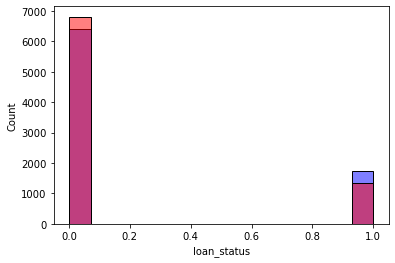

In [43]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [44]:
from sklearn import metrics

accuracy_1=metrics.accuracy_score(y_test,y_test_pred)
accuracy_1

0.8889025288485146

### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [46]:
y_test_pred = classifier.predict(X_test_transformed)

In [47]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10775,0,0
28127,0,0
17835,1,1
15419,0,0
20158,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

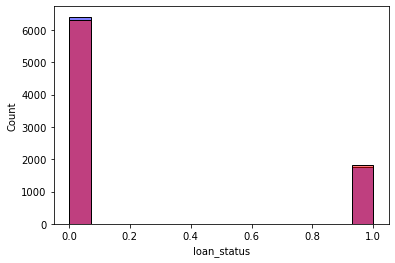

In [48]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [49]:
from sklearn import metrics
accuracy_2=metrics.accuracy_score(y_test,y_test_pred)
accuracy_2

0.8924625583108274

### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [51]:
y_test_pred = classifier.predict(X_test_transformed)

In [52]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10775,0,0
28127,0,0
17835,1,1
15419,0,0
20158,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

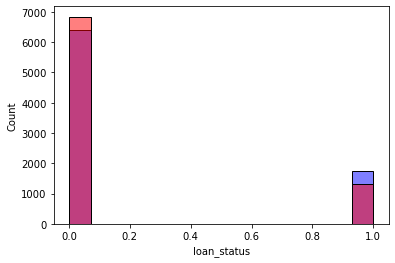

In [53]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [54]:
accuracy_3=metrics.accuracy_score(y_test,y_test_pred)
accuracy_3

0.937024306408053

### LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_transformed, y_train)

LogisticRegression(random_state=0)

In [56]:
y_test_pred = classifier.predict(X_test_transformed)

In [57]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10775,0,0
28127,0,0
17835,1,0
15419,0,0
20158,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

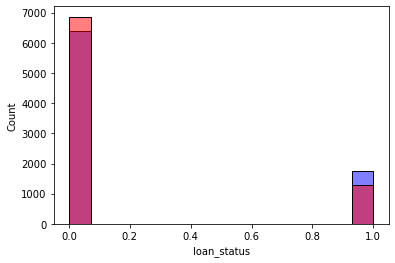

In [58]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [59]:
accuracy_4=metrics.accuracy_score(y_test,y_test_pred)
accuracy_4

0.8666830346182175

### Support Vector Machine

In [60]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [61]:
y_test_pred = classifier.predict(X_test_transformed)

In [62]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10775,0,0
28127,0,0
17835,1,1
15419,0,0
20158,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

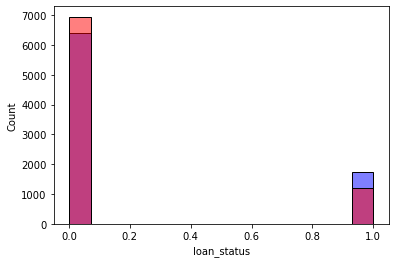

In [63]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [64]:
accuracy_5=metrics.accuracy_score(y_test,y_test_pred)
accuracy_5

0.9127178983550208

In [73]:
dict=pd.DataFrame({'Classifiers':['KNN_C','DecisionTree_C','RandomForest_C','LogisticRegression','SVC'],
                'values':[accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5]})
dict

,Classifiers,values
0,KNN_C,0.888903
1,DecisionTree_C,0.892463
2,RandomForest_C,0.937024
3,LogisticRegression,0.866683
4,SVC,0.912718


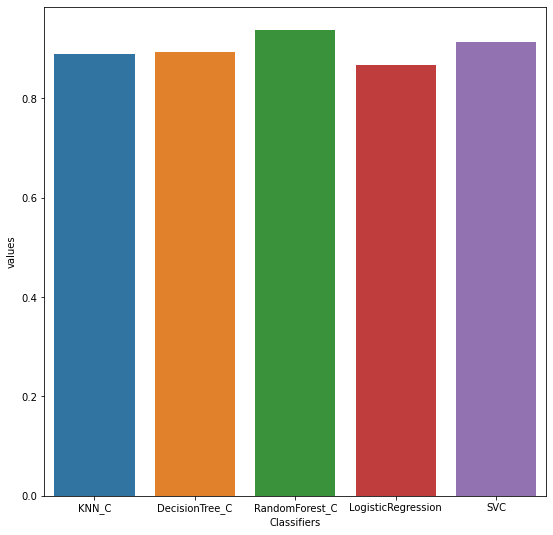

In [74]:
plt.figure(figsize=(9,9))
sns.barplot(x='Classifiers',y='values',data=dict)
plt.show()

`Conclusion`:Random forest classifier is the best algorithm for accuracy prediction.